In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as ss

# Read in the data
df_bottom = pd.read_csv('fig_2_of_lamb_fine_structure_of_the_hydrogen_shortdoi_cgbz6x_BottomLine.csv')
df_top = pd.read_csv('fig_2_of_lamb_fine_structure_of_the_hydrogen_shortdoi_cgbz6x_TopLine.csv')


Fitting the initial measurements with B on the x-axis and f on the y-axis

(0.0, 2000.0)

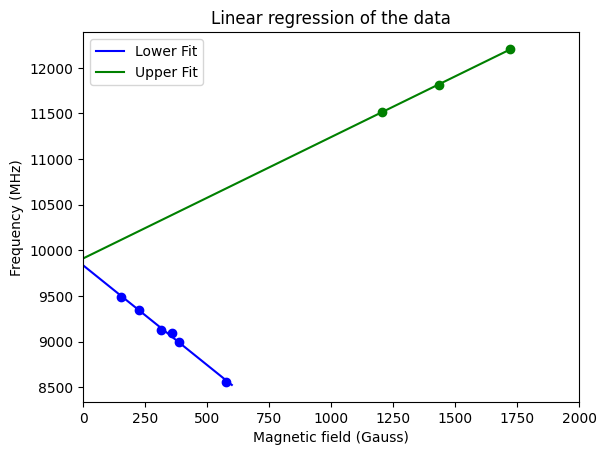

In [4]:
reg_results_bottom = ss.linregress(df_bottom['x'], df_bottom['Curve1'])
reg_results_top = ss.linregress(df_top['x'], df_top['Curve1'])
plt.plot(np.arange(0, 600), reg_results_bottom.intercept + reg_results_bottom.slope*np.arange(0, 600), 'b', label="Lower Fit")
plt.plot(df_bottom['x'], df_bottom['Curve1'], 'o', color="blue")
plt.plot(np.arange(0, 1725), reg_results_top.intercept + reg_results_top.slope*np.arange(0, 1725), 'g', label="Upper Fit")
plt.plot(df_top['x'], df_top['Curve1'], 'o', color="green")
plt.title('Linear regression of the data')
plt.xlabel('Magnetic field (Gauss)')
plt.ylabel("Frequency (MHz)")
plt.legend()
plt.xlim(0, 2000)

Swapping the x and y axis and then fitting new lines to the data

LinregressResult(slope=-0.4553971986701891, intercept=4480.812130609485, rvalue=-0.9975090050498387, pvalue=9.299855381209674e-06, stderr=0.016101796389681435, intercept_stderr=146.65724869505675)
LinregressResult(slope=0.7513630378845962, intercept=-7446.862886318501, rvalue=0.9994960473226472, pvalue=0.020211951132674152, stderr=0.023862937250877878, intercept_stderr=282.7543757032746)


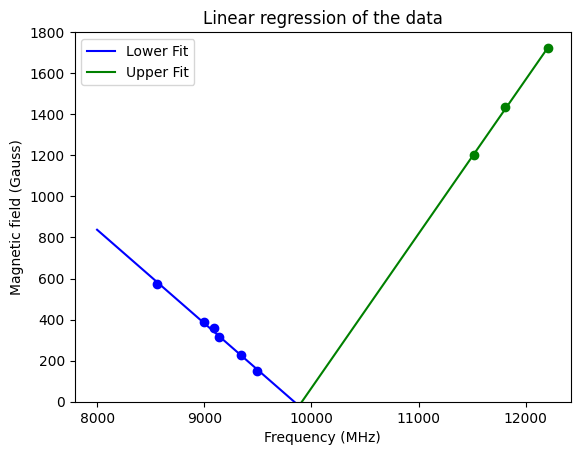

In [5]:
reg_bottom1 = ss.linregress(df_bottom['Curve1'], df_bottom['x'])
reg_top1 = ss.linregress(df_top['Curve1'], df_top['x'])
print(reg_bottom1)
print(reg_top1)

plt.plot(np.arange(8000, 10000), reg_bottom1.intercept + reg_bottom1.slope*np.arange(8000, 10000), 'b', label="Lower Fit")
plt.plot(df_bottom['Curve1'], df_bottom['x'], 'o', color="blue")
plt.plot(np.arange(9800, 12200), reg_top1.intercept + reg_top1.slope*np.arange(9800, 12200), 'g', label="Upper Fit")
plt.plot(df_top['Curve1'], df_top['x'], 'o', color="green")
plt.title('Linear regression of the data')
plt.ylabel('Magnetic field (Gauss)')
plt.xlabel("Frequency (MHz)")
plt.ylim(0,1800)
plt.legend()

Calculating the following values:

$\sigma_B=\sqrt{\frac{\sum_i^n\Big[y_i-(mx_i+b)\Big]^2}{(n-2)}}$

$\sigma_b=\sqrt{\frac{\sigma_y^2}{n}\cdot\frac{\overline{x^2}}{(\overline{x^2}-\overline{x}^2)}}=\sqrt{\frac{\sum_i^n\Big[y_i-(mx_i+b)\Big]^2}{n(n-2)}\cdot\frac{\overline{x^2}}{(\overline{x^2}-\overline{x}^2)}}$

$\sigma_m=\sqrt{\frac{\sigma_y^2}{n}\cdot\frac{1}{(\overline{x^2}-\overline{x}^2)}}=\sqrt{\frac{\sum_i^n\Big[y_i-(mx_i+b)\Big]^2}{n(n-2)}\cdot\frac{1}{(\overline{x^2}-\overline{x}^2)}}$

$\sigma_f=\sqrt{\sigma_m^2\Big(\frac{b}{m^2}\Big)^2+\sigma_b^2\Big(-\frac{1}{m}\Big)^2+2\frac{\sum_i^n\Big[y_i-(mx_i+b)\Big]^2\overline{x}}{n(n-2)(\overline{x^2}-\overline{x}^2)}\Big(\frac{b}{m^2}\Big)\Big(\frac{1}{m}\Big)}$

In [7]:
sigma_yup=np.sqrt(np.sum((df_top['x']-(reg_top1.slope*df_top['Curve1']+reg_top1.intercept))**2)/(len(df_top['x'])-2))
sigma_bup=np.sqrt(sigma_yup**2/len(df_top['x'])*(df_top['Curve1']**2).mean()/((df_top['Curve1']**2).mean()-df_top['Curve1'].mean()**2))
sigma_mup=np.sqrt(sigma_yup**2/len(df_top['x'])/((df_top['Curve1']**2).mean()-df_top['Curve1'].mean()**2))
sigma_fup=np.sqrt(sigma_mup**2*(reg_top1.intercept/reg_top1.slope**2)**2+sigma_bup**2*(-1/reg_top1.slope)**2+2*sigma_yup**2/(len(df_top['x'])*(len(df_top['x'])-2))*(df_top['Curve1']**2).mean()/((df_top['Curve1']**2).mean()-df_top['Curve1'].mean()**2)*(reg_top1.intercept/reg_top1.slope**2)*(1/reg_top1.slope))
print(sigma_yup, sigma_bup, sigma_mup, sigma_fup)

11.630809270918277 282.754375703297 0.023862937250879766 nan


C:\Users\matth\AppData\Local\Temp\ipykernel_12020\1541081958.py:4: RuntimeWarning: invalid value encountered in sqrt
  sigma_fup=np.sqrt(sigma_mup**2*(reg_top1.intercept/reg_top1.slope**2)**2+sigma_bup**2*(-1/reg_top1.slope)**2+2*sigma_yup**2/(len(df_top['x'])*(len(df_top['x'])-2))*(df_top['Curve1']**2).mean()/((df_top['Curve1']**2).mean()-df_top['Curve1'].mean()**2)*(reg_top1.intercept/reg_top1.slope**2)*(1/reg_top1.slope))
